In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from joblib import load
from models import LitModel
from layers import ATAT
from elasticc import ElasticcDataset, get_dataloader
from custom_parser import parse_model_args, handler_parser
from utils.plottinglib import elasticc_confusion_matrix
from tqdm import tqdm
import warnings

warnings.filterwarnings("ignore")
import glob
import os
import matplotlib.pyplot as plt

In [2]:
code_dict = {
    "CART": "0",
    "Iax": "1",
    "91bg": "2",
    "Ia": "3",
    "Ib/c": "4",
    "II": "5",
    "SLSN": "6",
    "PISN": "7",
    "TDE": "8",
    "ILOT": "9",
    "KN": "10",
    "M-dwarf Flare": "11",
    "uLens": "12",
    "Dwarf Novae": "13",
    "AGN": "14",
    "Delta Scuti": "15",
    "RR Lyrae": "16",
    "Cepheid": "17",
    "EB": "18",
}

code_dict_sn = {
    "NO-SNIa": "0",
    "SNIa": "1",
}

classes_sn = np.array(list(code_dict_sn.keys()))
classes_ = np.array(list(code_dict.keys()))

In [3]:
# with open(f"./state_dicts/balto_aug_probs.pickle", "wb") as handle:
#         pickle.dump(balto_out, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open(f"./state_dicts/balto_mta_probs.pickle", "wb") as handle:
#     pickle.dump(balto_mta_out, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open(f"./state_dicts/messi_mta_probs.pickle", "wb") as handle:
#     pickle.dump(messi_mta_out, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open(f"./state_dicts/balto_true.pickle", "wb") as handle:
#     pickle.dump(true_probs, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [4]:
balto_true = load("./state_dicts/balto_true.pickle")
balto_probs = load("./state_dicts/balto_mta_probs_at_prod.pickle")

balto_true_sn = load("./state_dicts/balto_true_sn.pickle")
balto_probs_sn = load("./state_dicts/balto_mta_probs_sn.pickle")


balto_mta_probs = load("./state_dicts/balto_mta_probs.pickle")
messi_probs = load("./state_dicts/messi_mta_probs_at_prod.pickle")
messi_mta_probs = load("./state_dicts/messi_mta_probs.pickle")

Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix


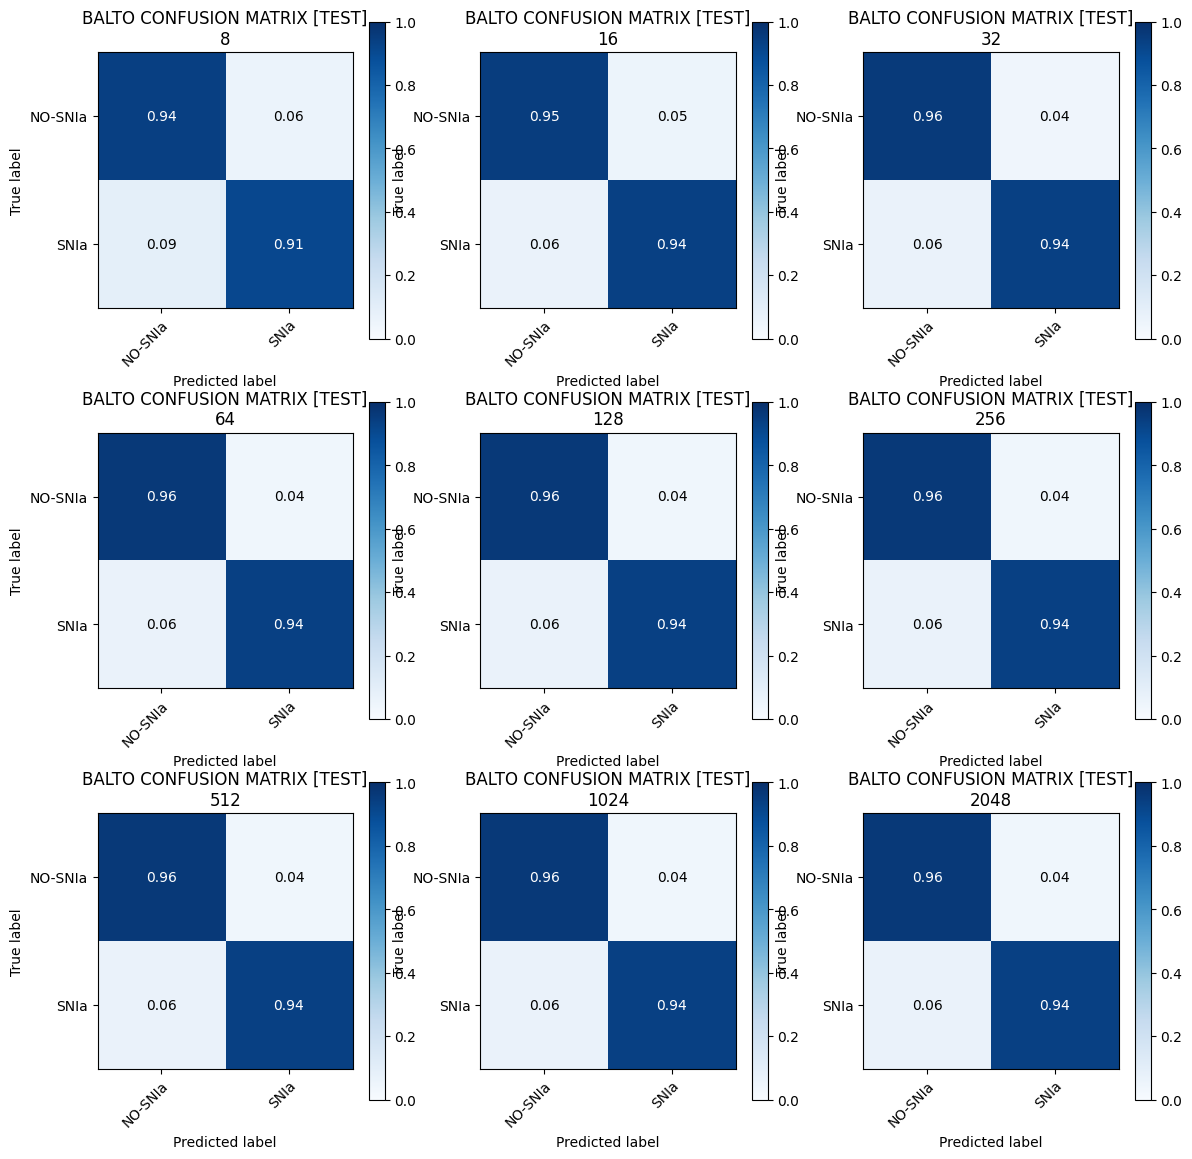

In [5]:
fig, axes = plt.subplots(3, 3, figsize=(14, 14))
times = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]
k = 0
for i in range(3):
    for j in range(3):
        elasticc_confusion_matrix(
            y_true=balto_true_sn[k],
            y_pred=balto_probs_sn[k].to(device="cpu").numpy(),
            classes=classes_sn,
            ax=axes[i, j],
            normalize=True,
            title=f"BALTO CONFUSION MATRIX [TEST]" + f"\n{times[k]}",
        )

        k += 1

plt.savefig("balto_prod_mta_sn.jpg", format="jpg")

Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix


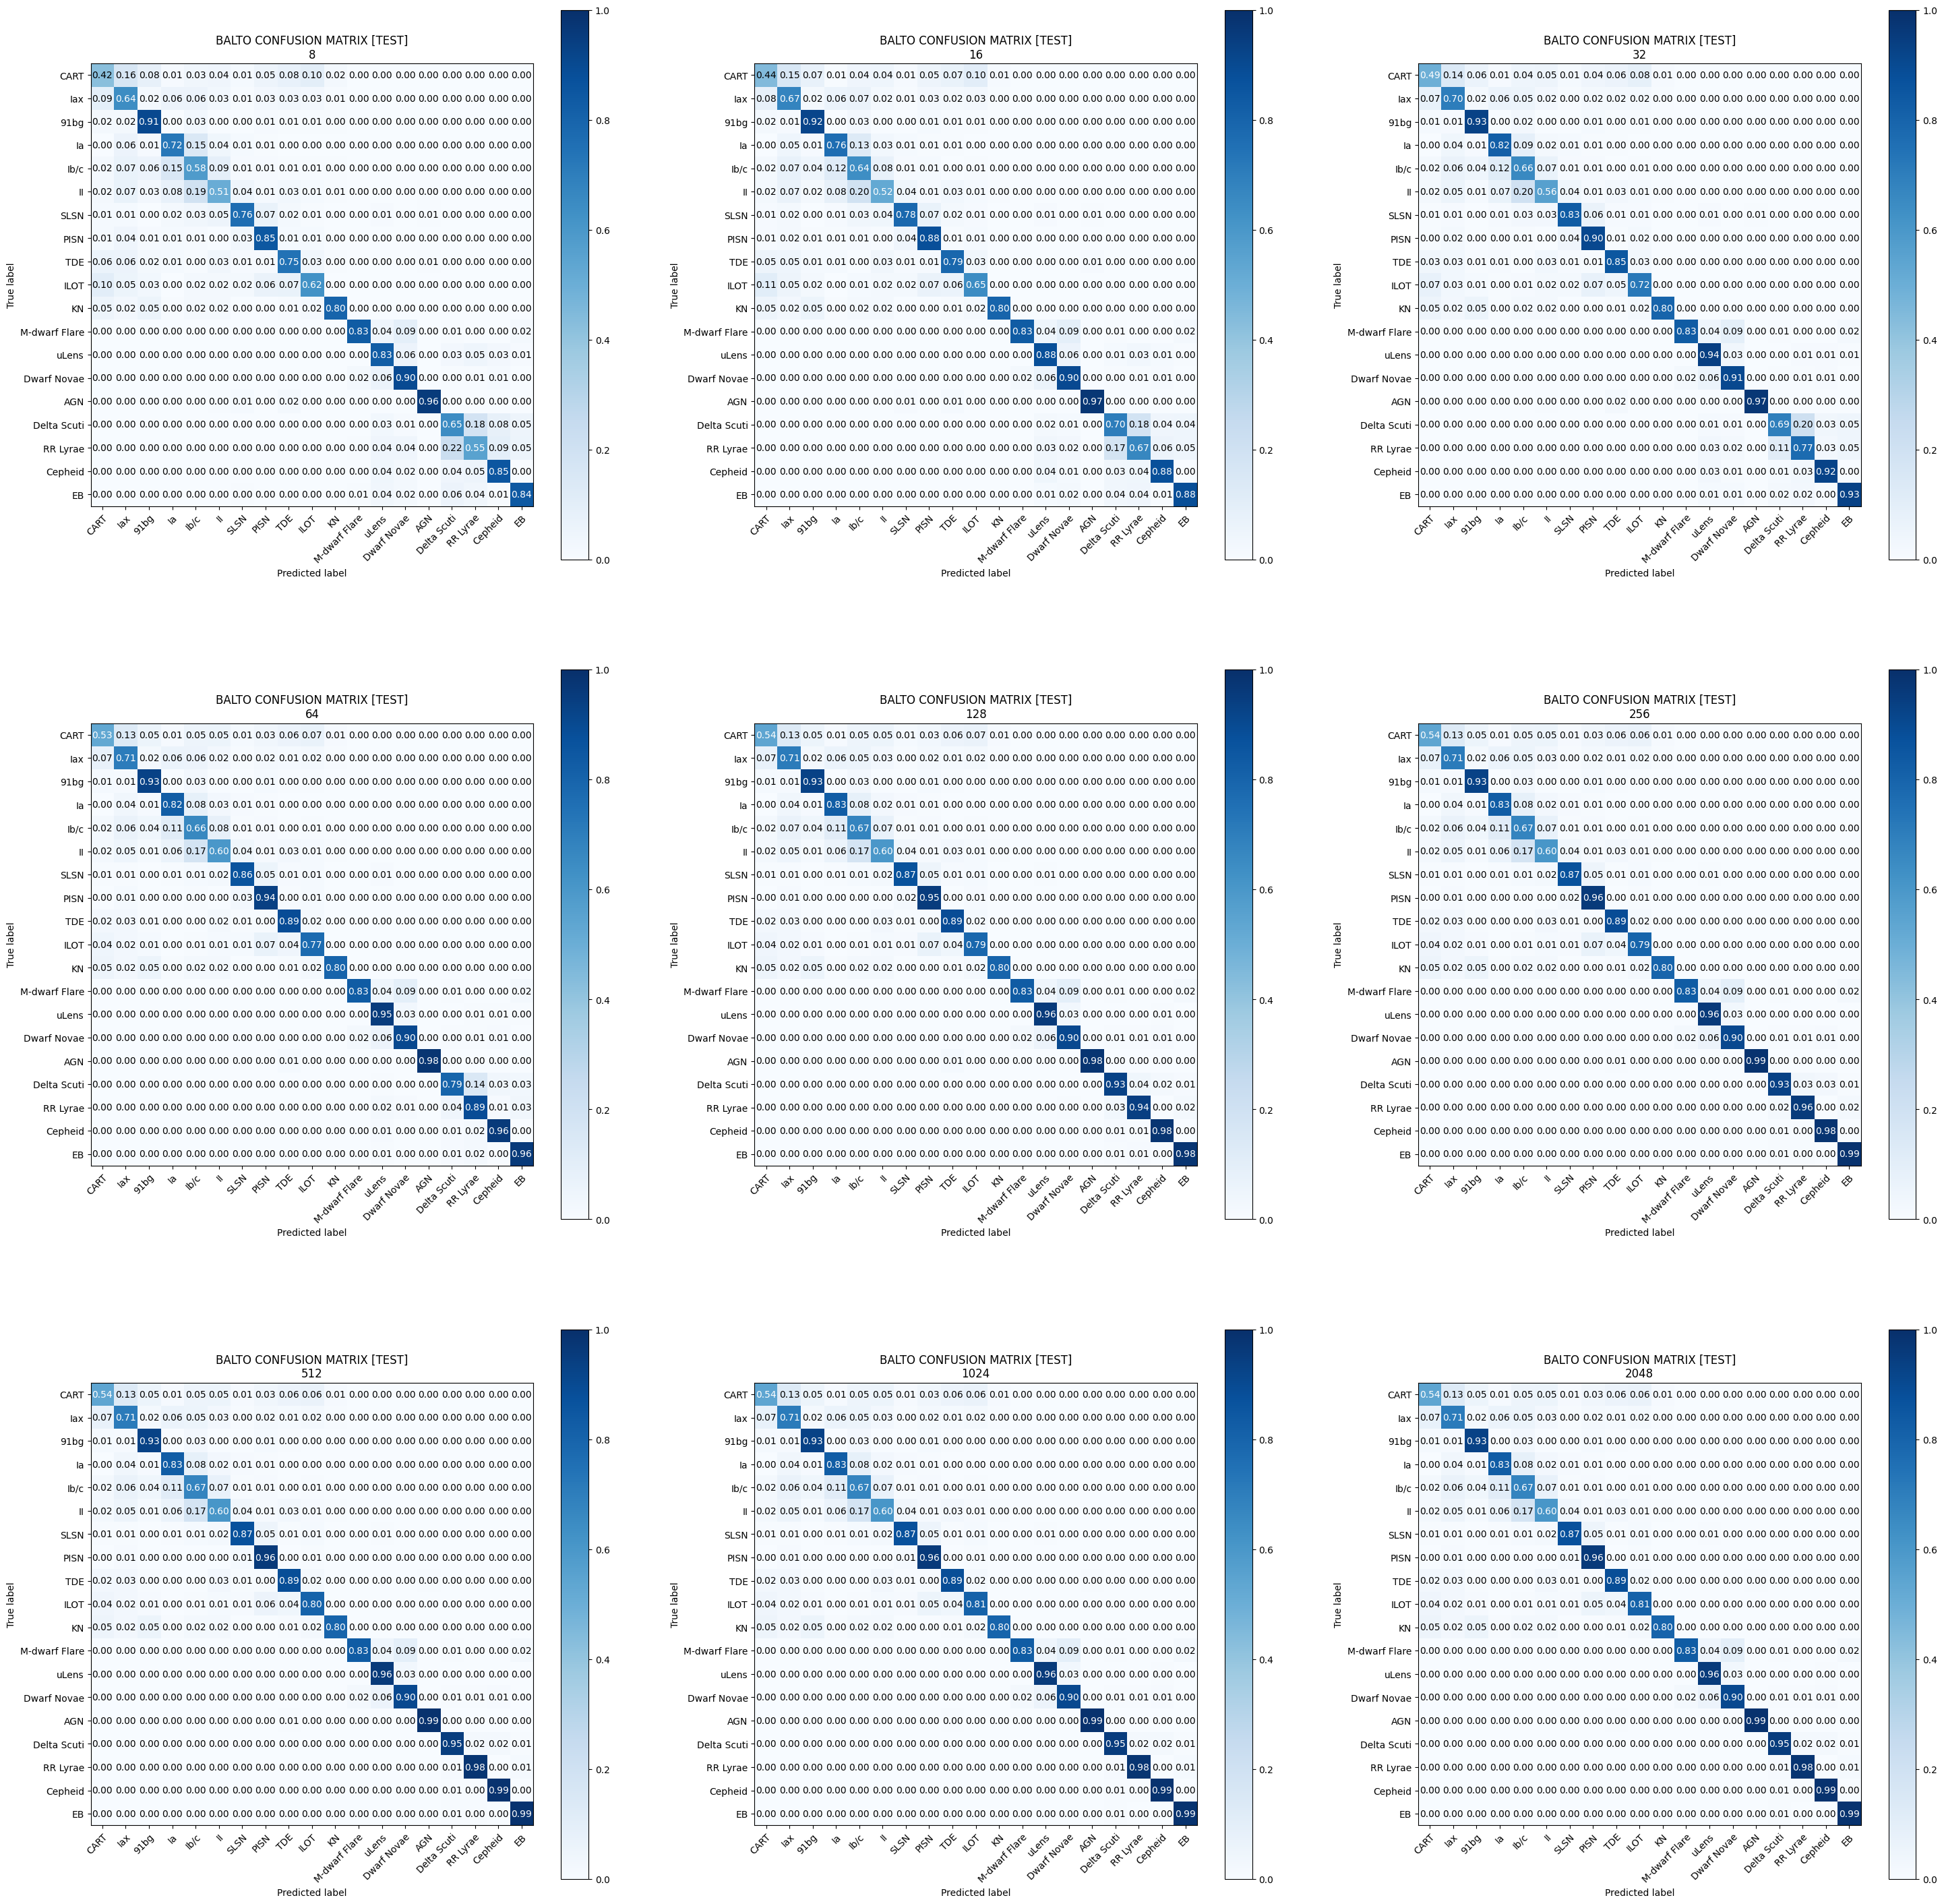

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(36, 36))
times = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]
k = 0
for i in range(3):
    for j in range(3):
        elasticc_confusion_matrix(
            y_true=balto_true[k],
            y_pred=balto_probs[k].to(device="cpu").numpy(),
            classes=classes_,
            ax=axes[i, j],
            normalize=True,
            title=f"BALTO CONFUSION MATRIX [TEST]" + f"\n{times[k]}",
        )

        k += 1

plt.savefig("balto_prod_mta.jpg", format="jpg")

In [9]:
balto_true[-1]

array([5, 5, 5, ..., 0, 0, 0])

Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix


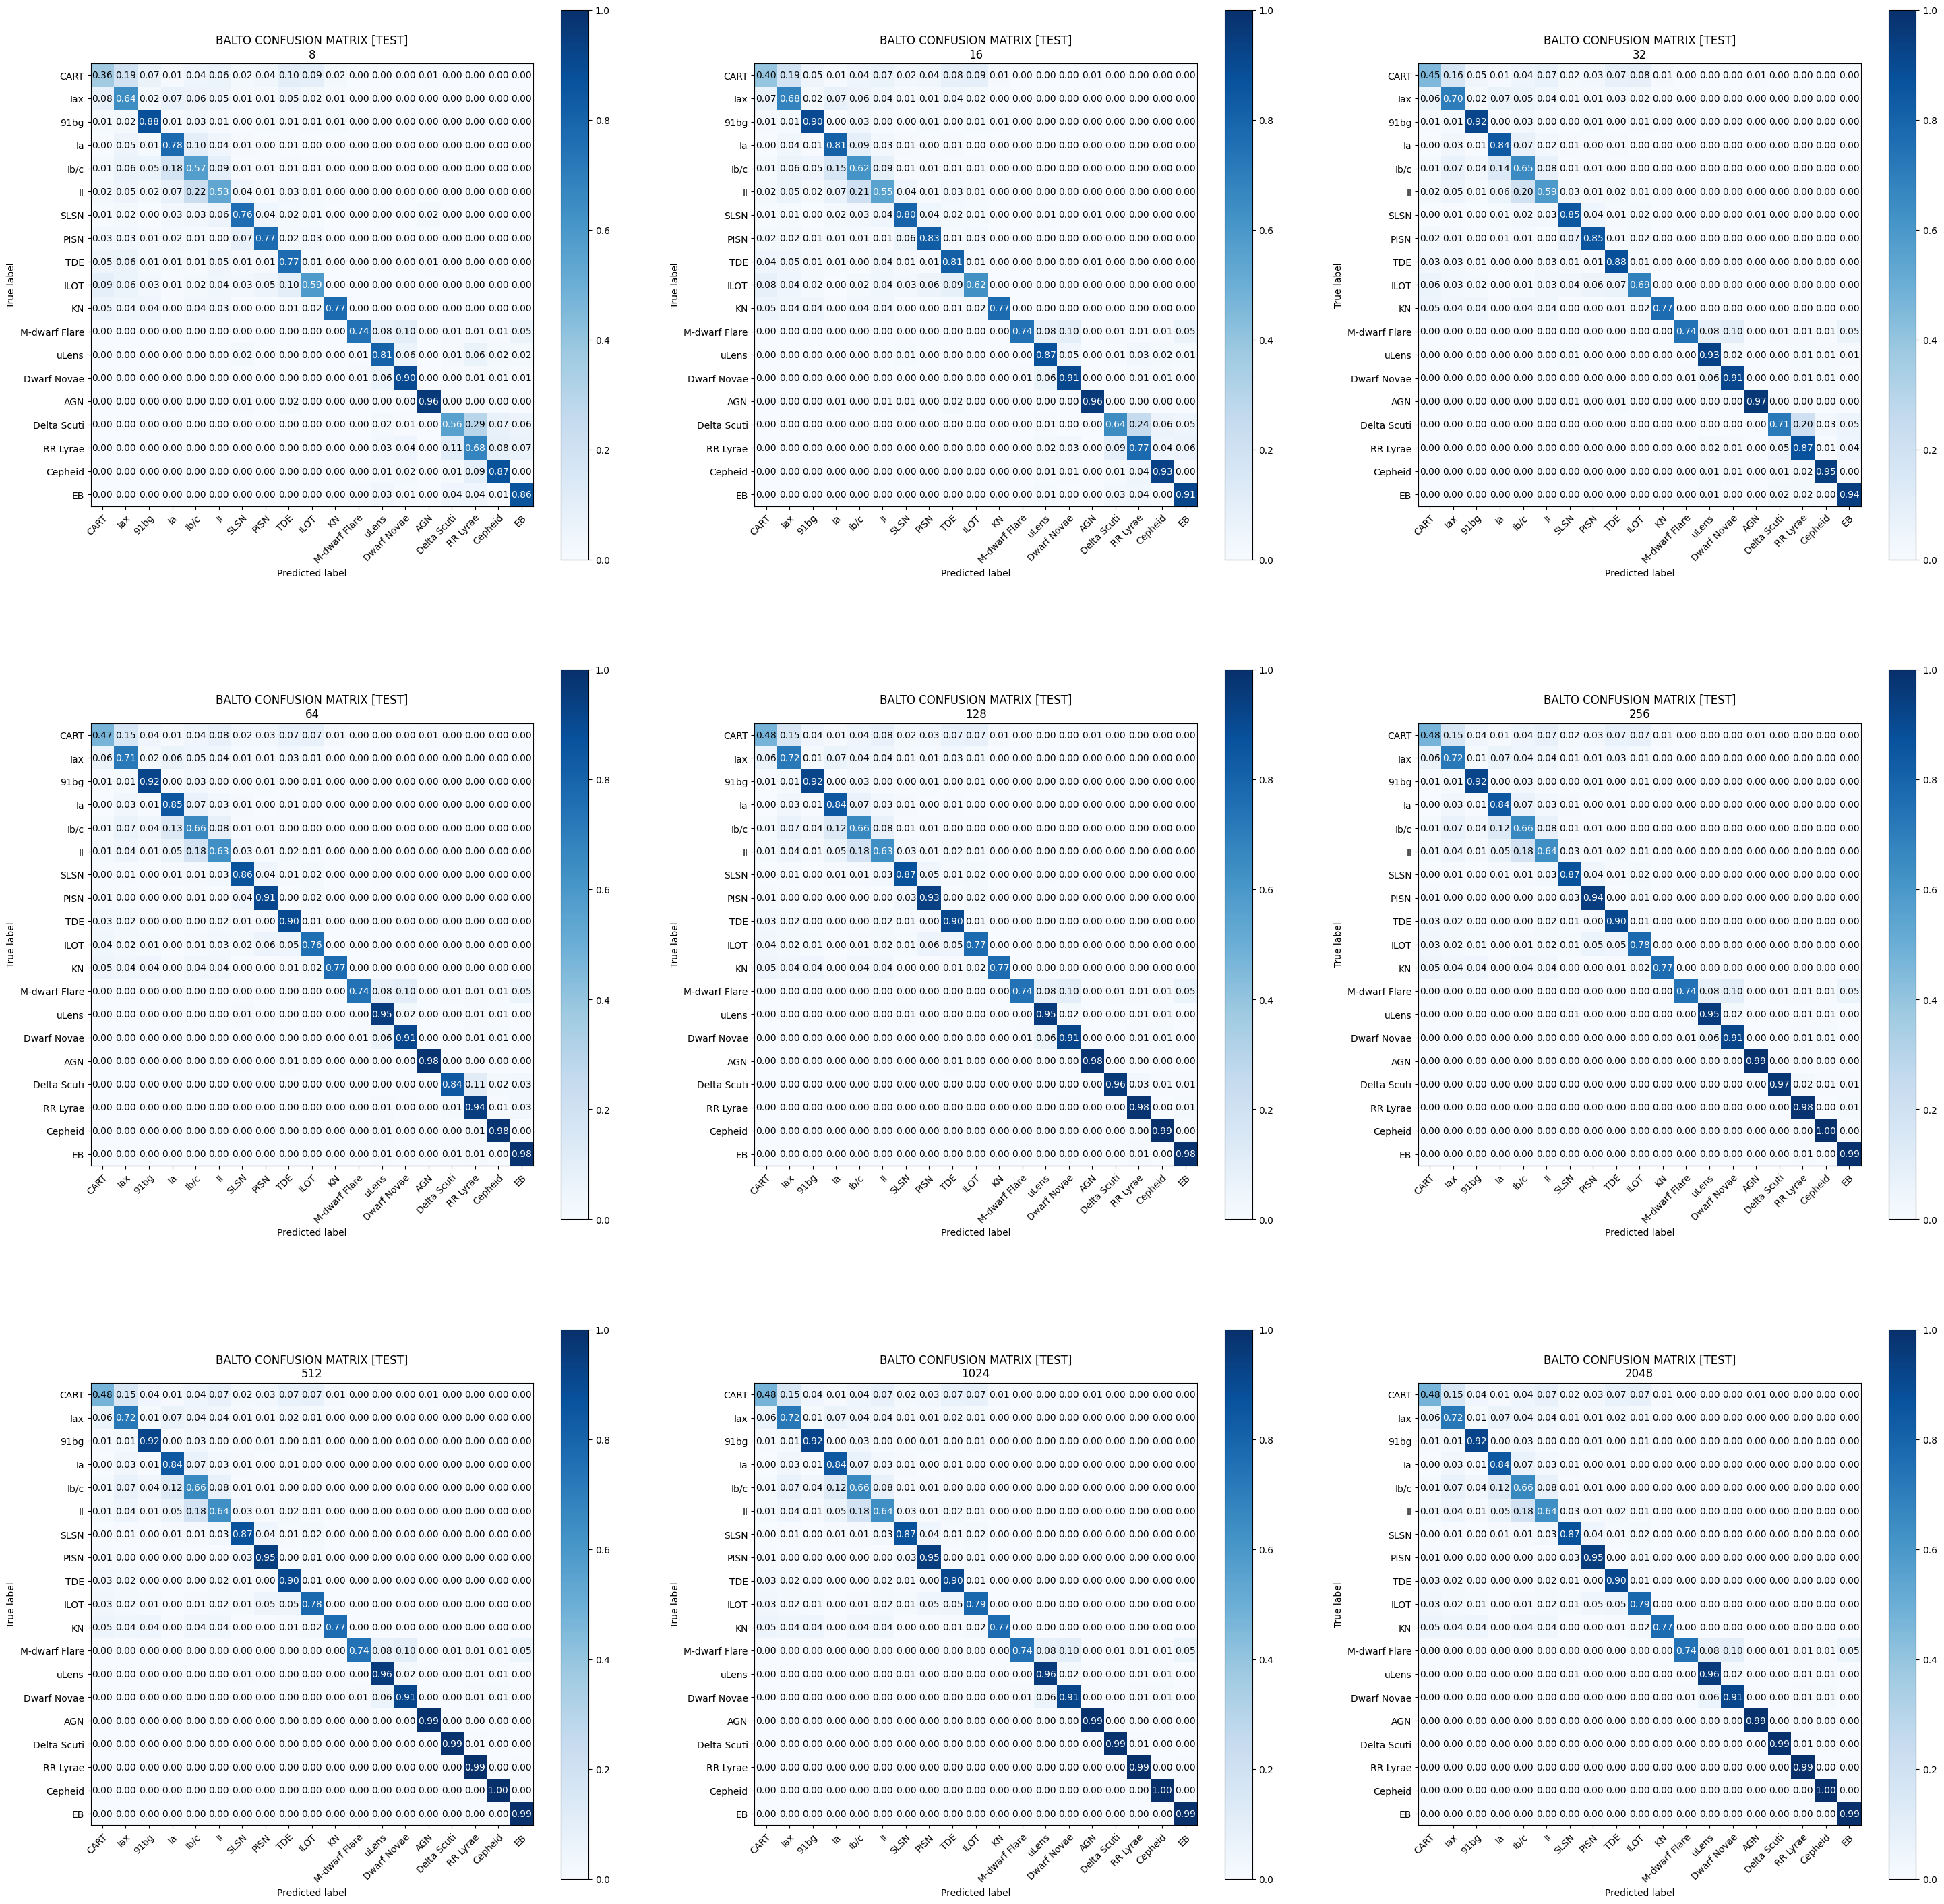

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(36, 36))
times = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]
k = 0
for i in range(3):
    for j in range(3):
        elasticc_confusion_matrix(
            y_true=balto_true[k],
            y_pred=messi_mta_probs[k].to(device="cpu").numpy(),
            classes=classes_,
            ax=axes[i, j],
            normalize=True,
            title=f"BALTO CONFUSION MATRIX [TEST]" + f"\n{times[k]}",
        )

        k += 1

plt.savefig("messi_mta.jpg", format="jpg")

Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix


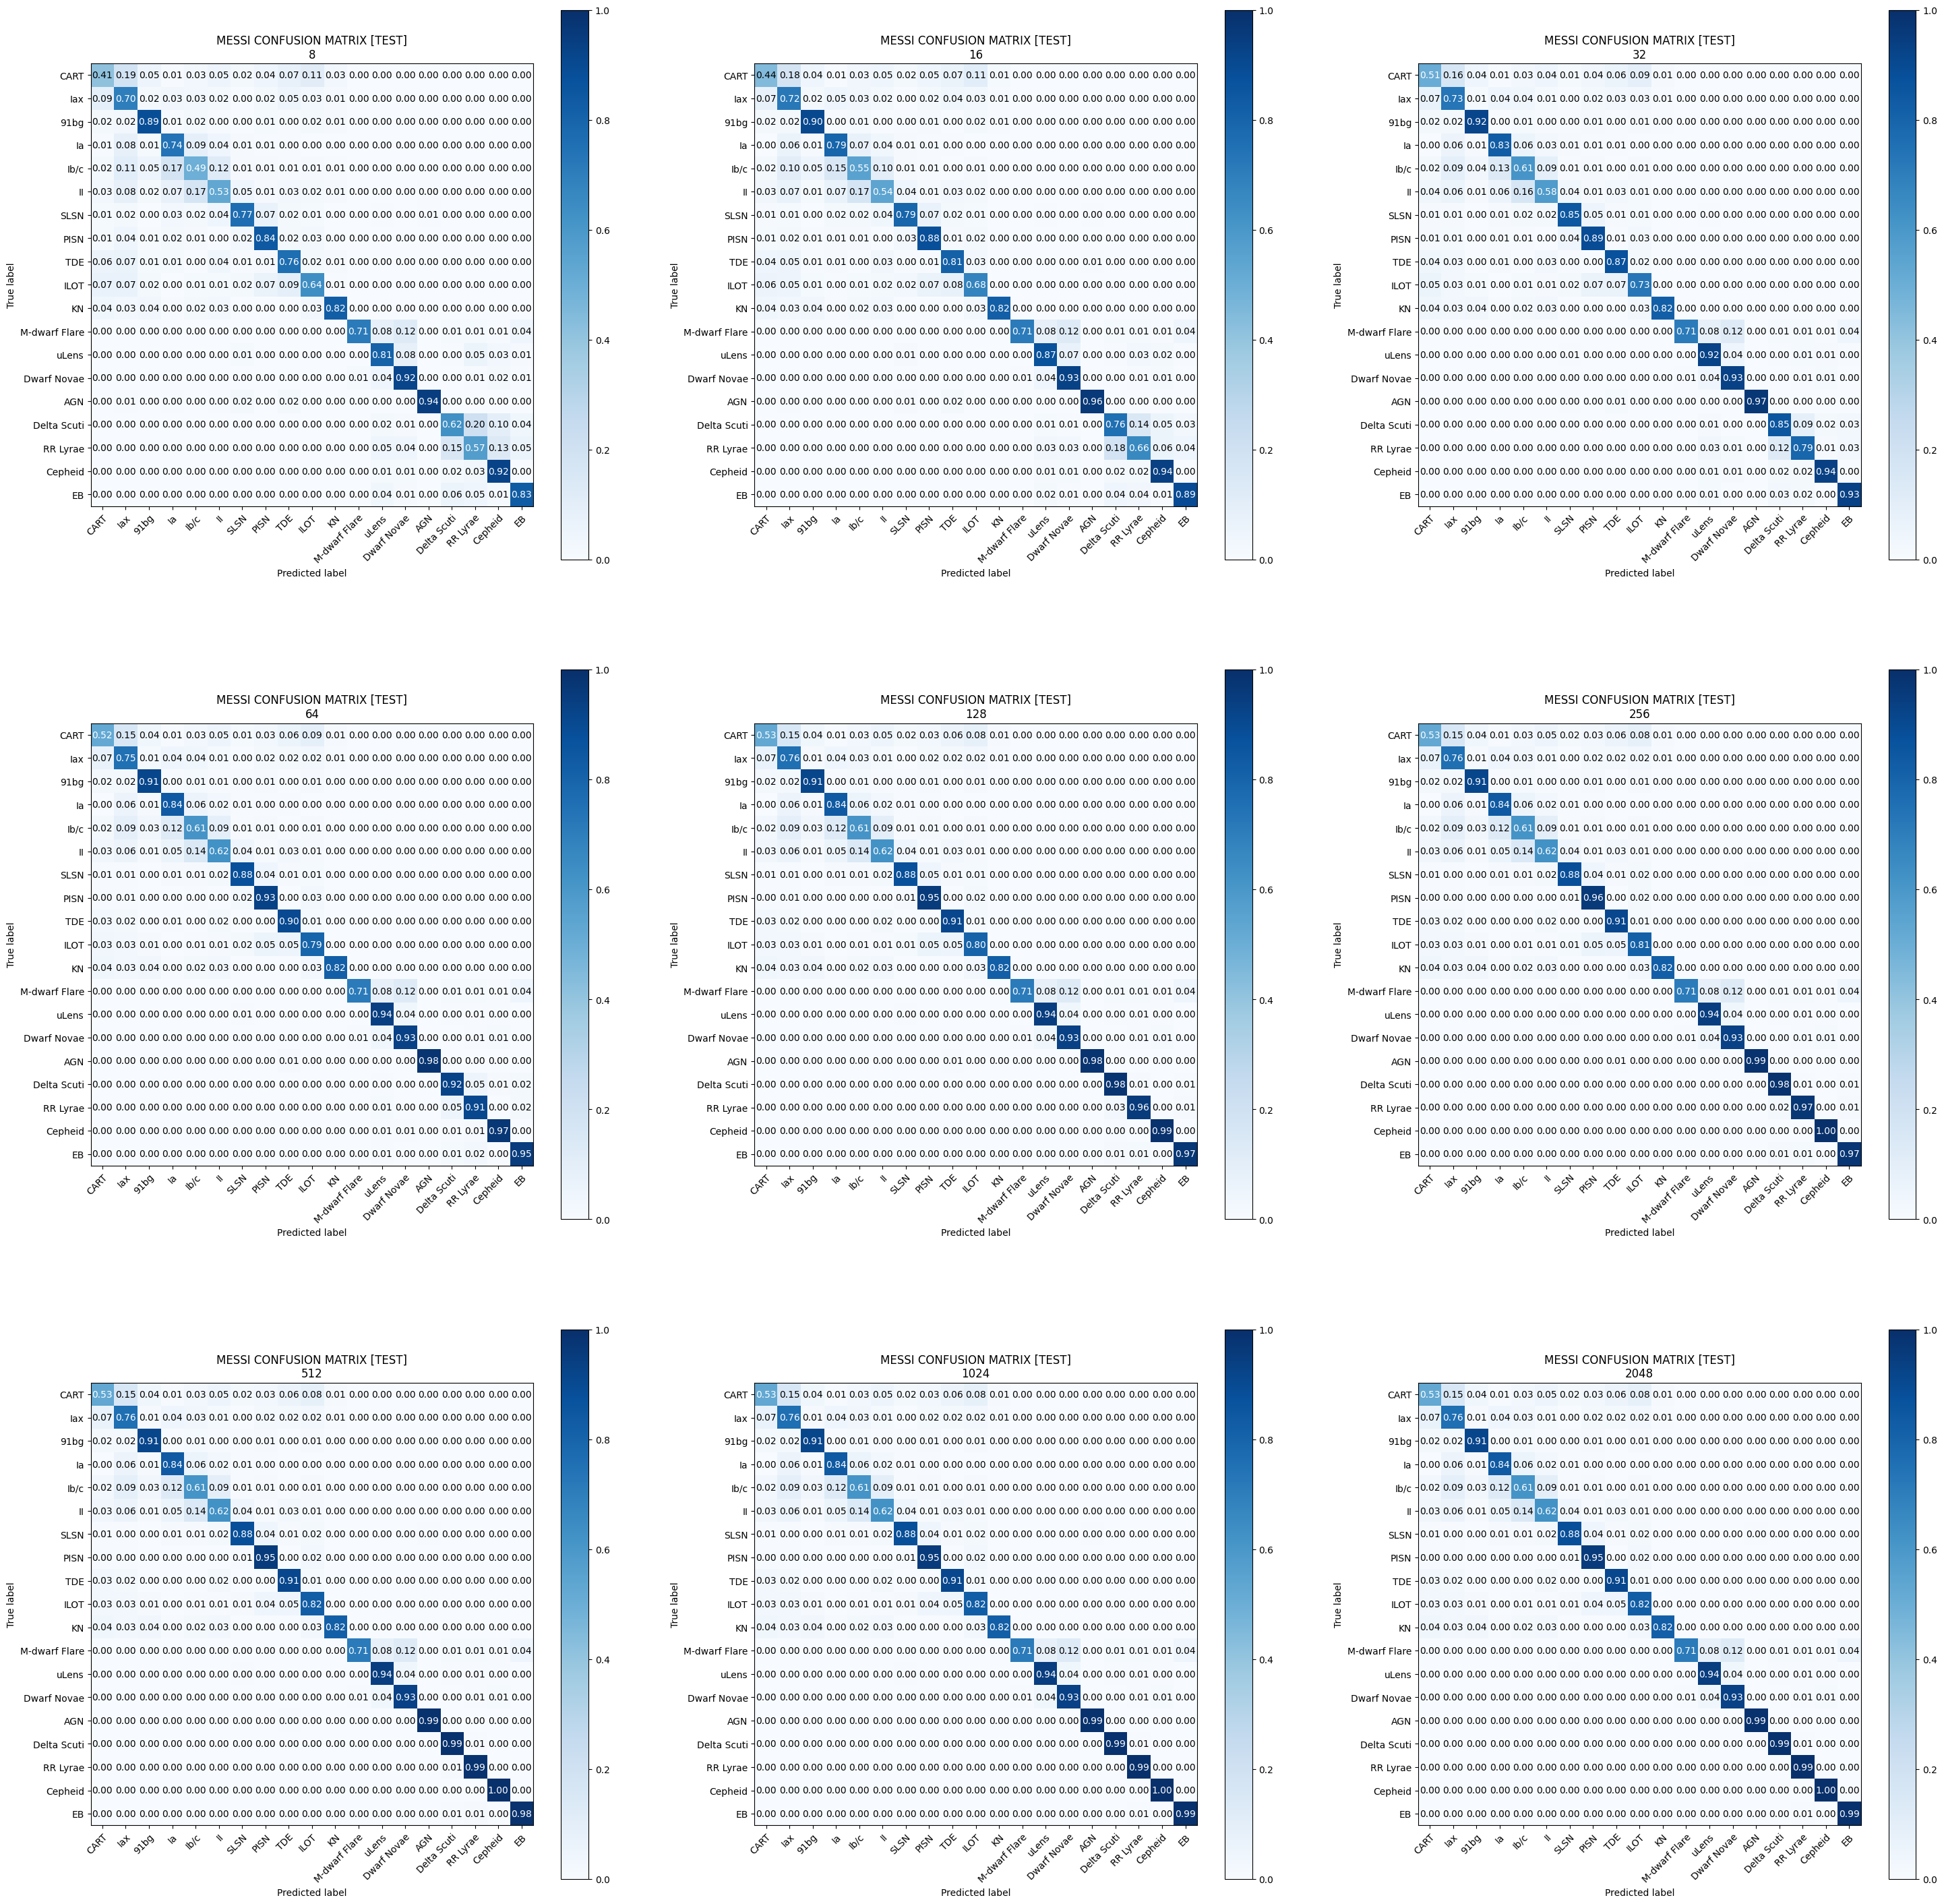

In [9]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(36, 36))
times = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]
k = 0
for i in range(3):
    for j in range(3):
        elasticc_confusion_matrix(
            y_true=balto_true[k],
            y_pred=messi_probs[k].to(device="cpu").numpy(),
            classes=classes_,
            ax=axes[i, j],
            normalize=True,
            title=f"MESSI CONFUSION MATRIX [TEST]" + f"\n{times[k]}",
        )

        k += 1

Normalized confusion matrix
Normalized confusion matrix


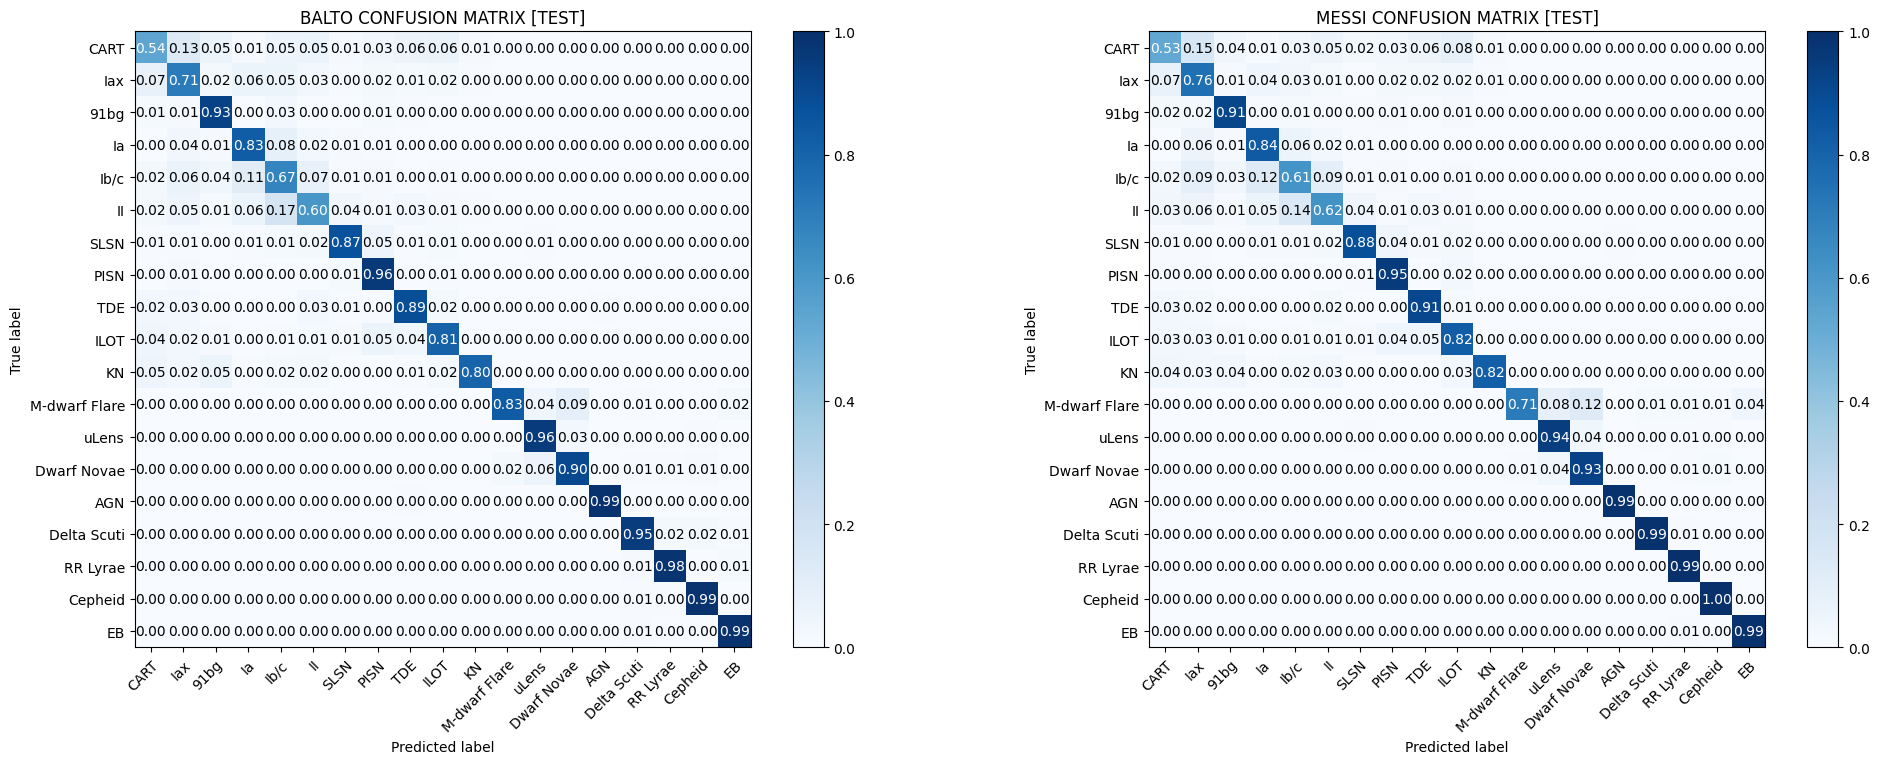

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(24, 8))


elasticc_confusion_matrix(
    y_true=balto_true[-1],
    y_pred=balto_probs[-1].to(device="cpu").numpy(),
    classes=classes_,
    ax=axes[0],
    normalize=True,
    title=f"BALTO CONFUSION MATRIX [TEST]",
)


elasticc_confusion_matrix(
    y_true=balto_true[-1],
    y_pred=messi_probs[-1].to(device="cpu").numpy(),
    classes=classes_,
    ax=axes[1],
    normalize=True,
    title=f"MESSI CONFUSION MATRIX [TEST]",
)

plt.savefig("comparacion.jpg", format="jpg")

In [15]:
from sklearn.metrics import f1_score, f1uracy_score

acc_messi = []
acc_balto = []
acc_balto_prod = []
acc_messi_prod = []
f1_messi = []
f1_balto = []
f1_balto_prod = []
f1_messi_prod = []


for at in range(9):
    acc_balto.append(accuracy_score(balto_true[at], balto_mta_probs[at]))
    acc_balto_prod.append(accuracy_score(balto_true[at], balto_probs[at]))
    acc_messi.append(accuracy_score(balto_true[at], messi_mta_probs[at]))
    acc_messi_prod.append(accuracy_score(balto_true[at], messi_probs[at]))
    f1_balto.append(f1_score(balto_true[at], balto_mta_probs[at], average="macro"))
    f1_balto_prod.append(f1_score(balto_true[at], balto_probs[at], average="macro"))
    f1_messi.append(f1_score(balto_true[at], messi_mta_probs[at], average="macro"))
    f1_messi_prod.append(f1_score(balto_true[at], messi_probs[at], average="macro"))

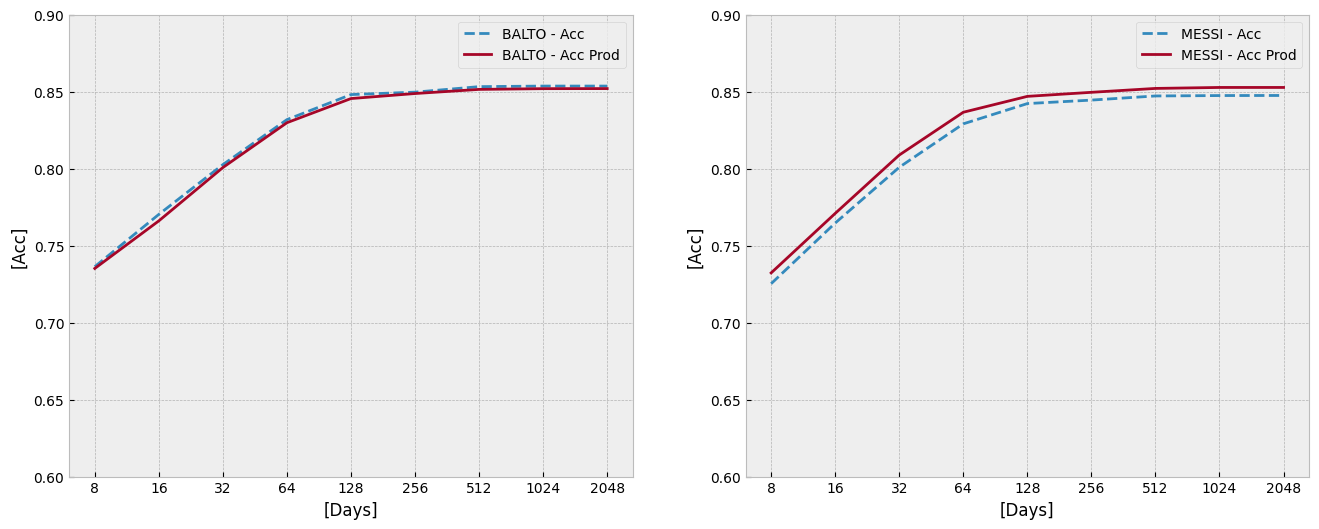

In [22]:
x_times = [str(t) for t in times]
plt.style.use("bmh")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))


axes[0].plot(x_times, acc_balto, "--", label="BALTO - Acc")
axes[0].plot(x_times, acc_balto_prod, "-", label="BALTO - Acc Prod")
axes[1].plot(x_times, acc_messi, "--", label="MESSI - Acc")
axes[1].plot(x_times, acc_messi_prod, "-", label="MESSI - Acc Prod")

for i in range(2):
    axes[i].set_ylim([0.6, 0.9])
    axes[i].set_xlabel("[Days]")
    axes[i].set_ylabel("[Acc]")
    axes[i].legend()

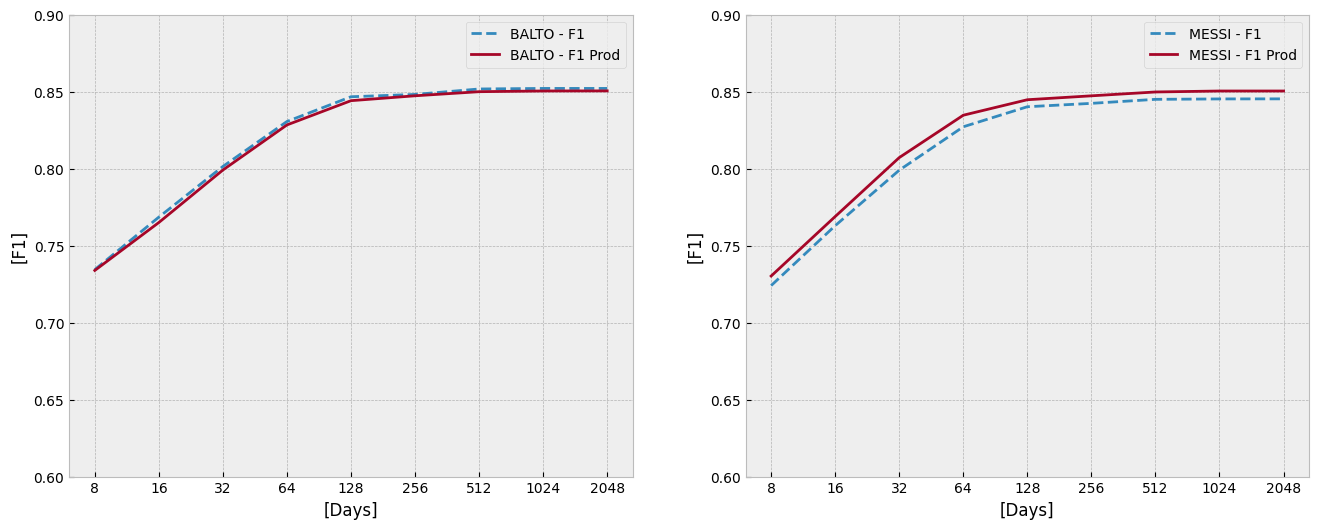

In [23]:
x_times = [str(t) for t in times]
plt.style.use("bmh")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(x_times, f1_balto, "--", label="BALTO - F1")
axes[0].plot(x_times, f1_balto_prod, "-", label="BALTO - F1 Prod")
axes[1].plot(x_times, f1_messi, "--", label="MESSI - F1")
axes[1].plot(x_times, f1_messi_prod, "-", label="MESSI - F1 Prod")

for i in range(2):
    axes[i].set_ylim([0.6, 0.9])
    axes[i].set_xlabel("[Days]")
    axes[i].set_ylabel("[F1]")
    axes[i].legend()